In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [3]:
import pandas as pd
df= pd.read_csv('C://Users//Ayush//Desktop//genres_v2.csv')
df.head()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_16140\1027769265.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C://Users//Ayush//Desktop//genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
df= df.drop(['id','uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title' ,'type'], axis=1)

In [5]:
df['duration_min'] = df['duration_ms']/60000
df=df.drop(['duration_ms'], axis=1)

In [6]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_min
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,4,Dark Trap,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,4,Dark Trap,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,4,Dark Trap,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,3,Dark Trap,2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4,Dark Trap,2.054967


In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,3.972580,4.181097
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,0.268342,1.715962
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,1.000000,0.426667
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,4.000000,2.997333
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,4.000000,3.746000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,4.000000,5.018883
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,5.000000,15.217533


In [8]:
df.isnull().sum()
df = df.drop_duplicates()

In [9]:
df["genre"].value_counts()

Underground Rap    5771
Dark Trap          4518
Hiphop             2960
trance             2734
techno             2632
psytrance          2610
dnb                2407
hardstyle          2277
trap               2226
techhouse          2192
RnB                2039
Trap Metal         1897
Rap                1809
Emo                1601
Pop                 452
Name: genre, dtype: int64

In [10]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.\n')

There are 38125 rows and 14 columns in the dataset.



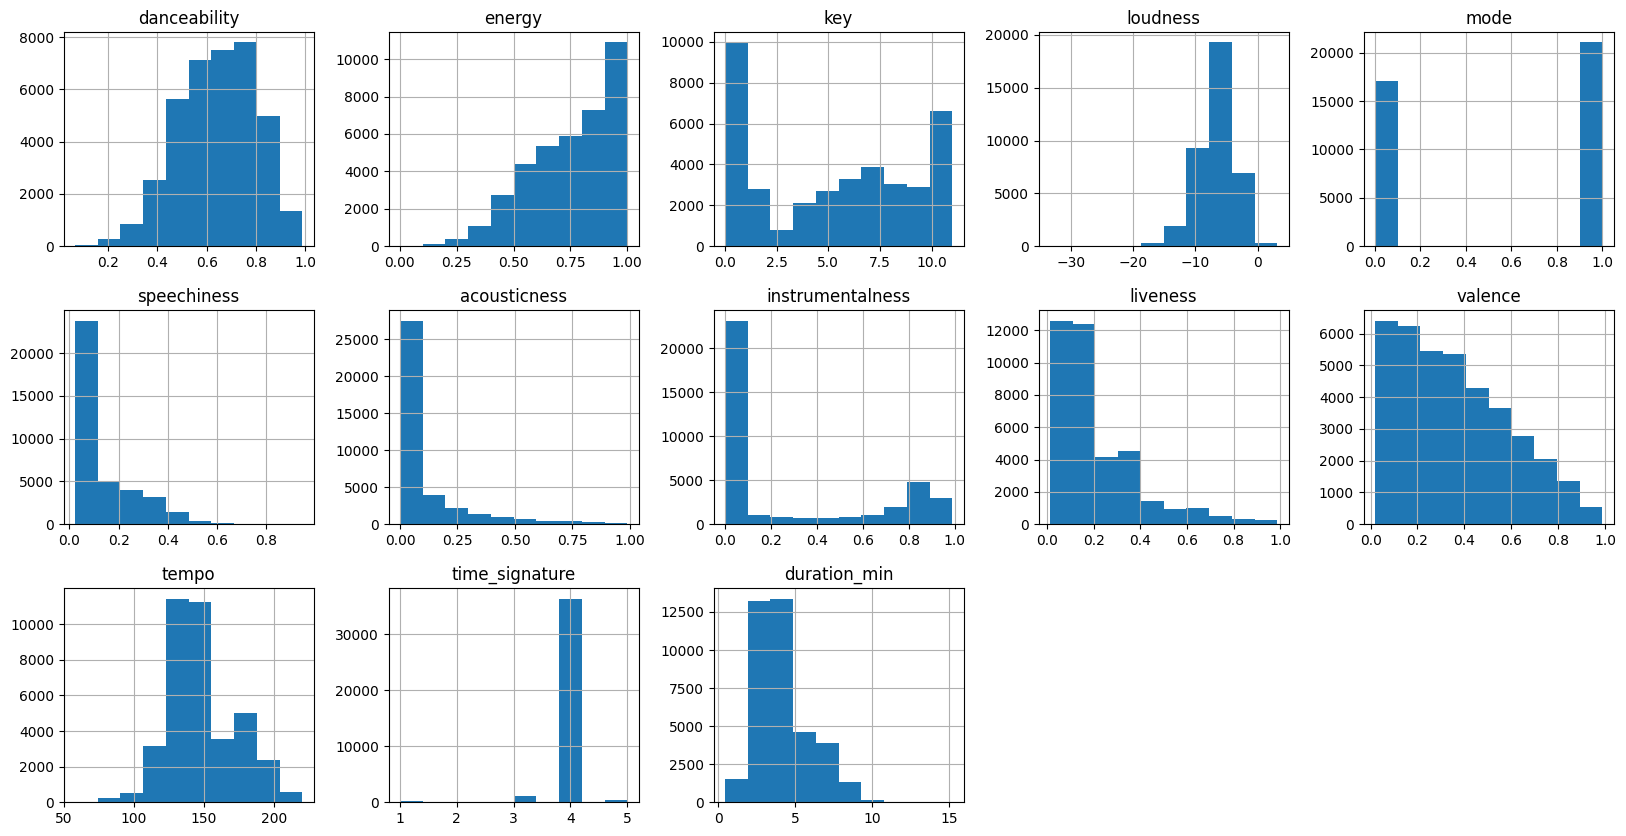

In [11]:
import matplotlib.pyplot as plt
numeric = df._get_numeric_data()
genre = df['genre']
num_hist = numeric.hist(layout=(3,5), figsize = (20,10))
plt.show()

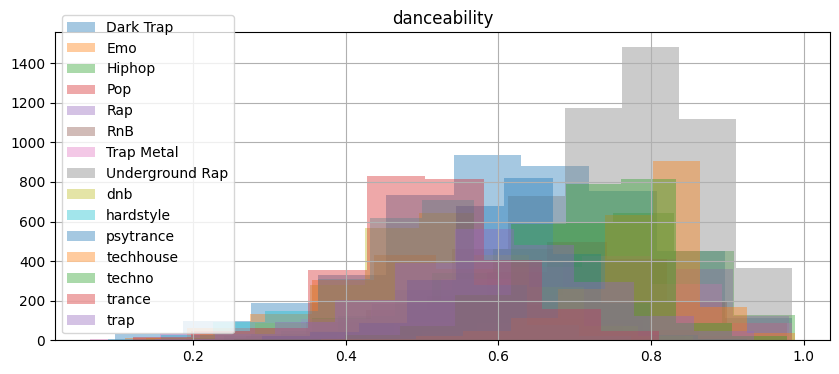

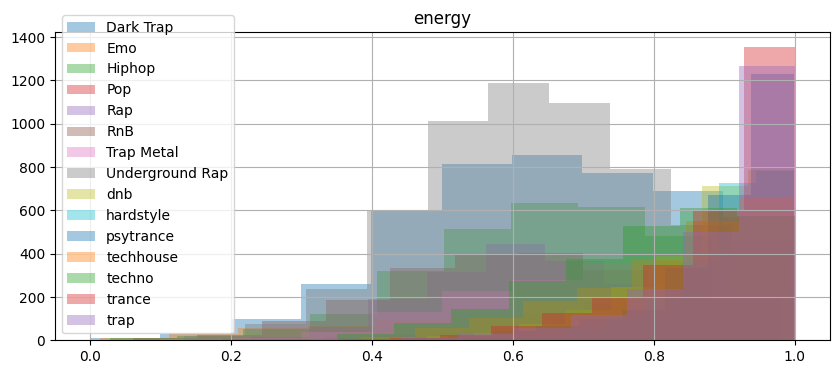

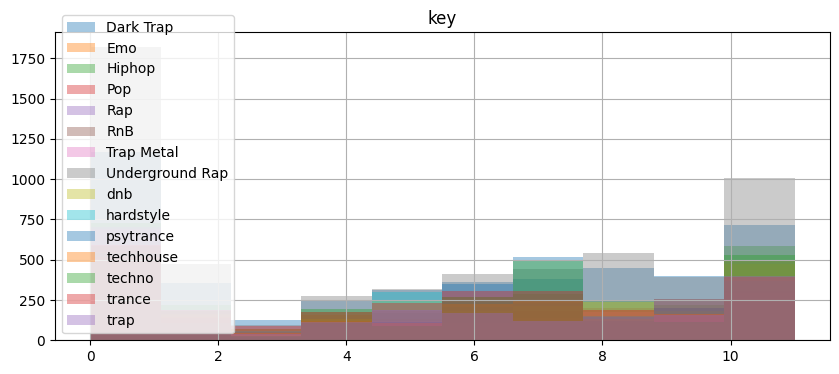

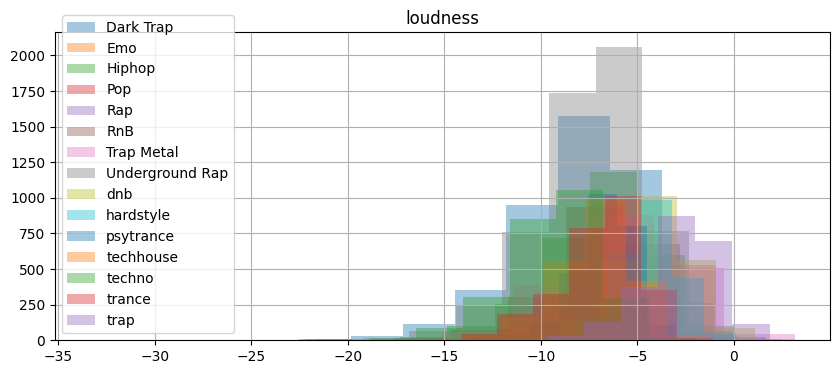

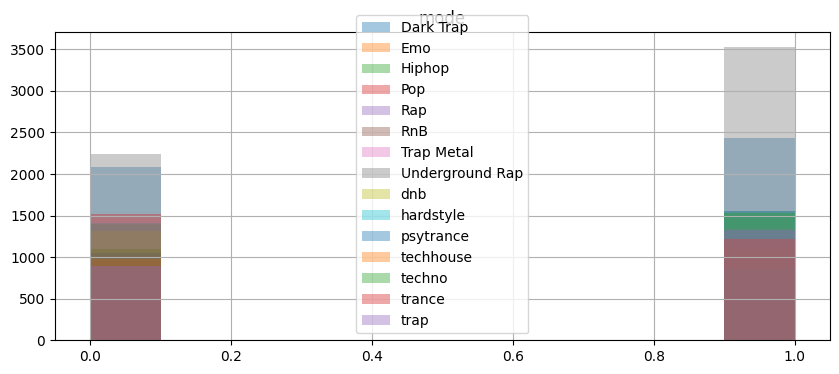

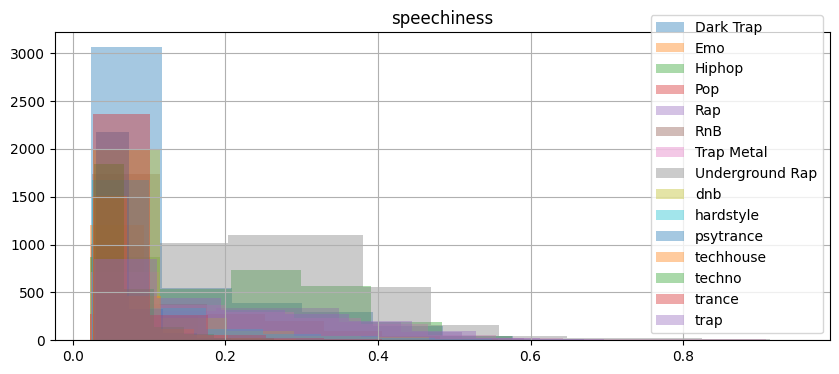

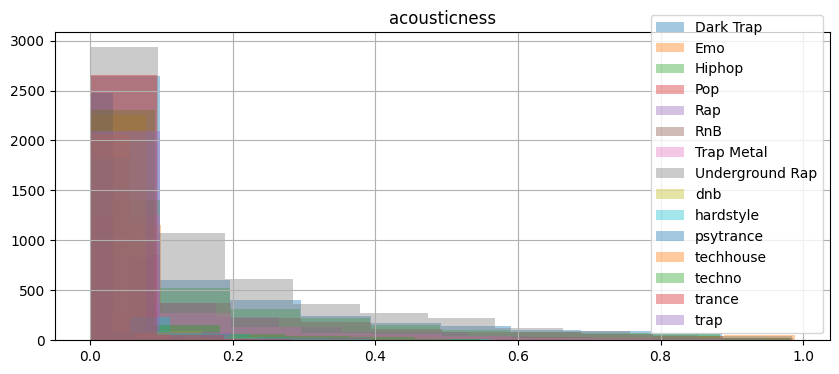

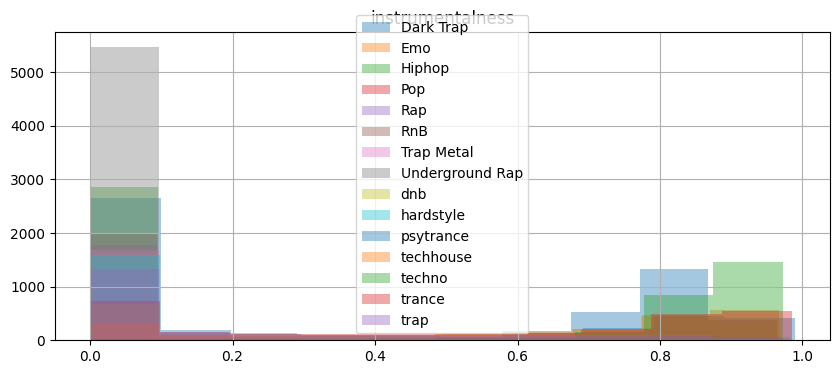

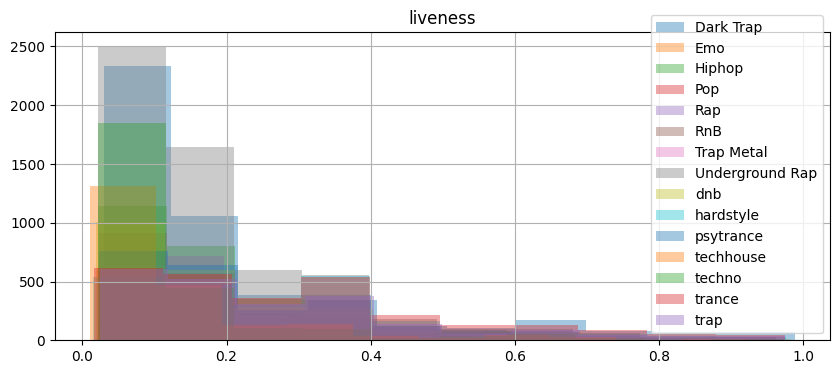

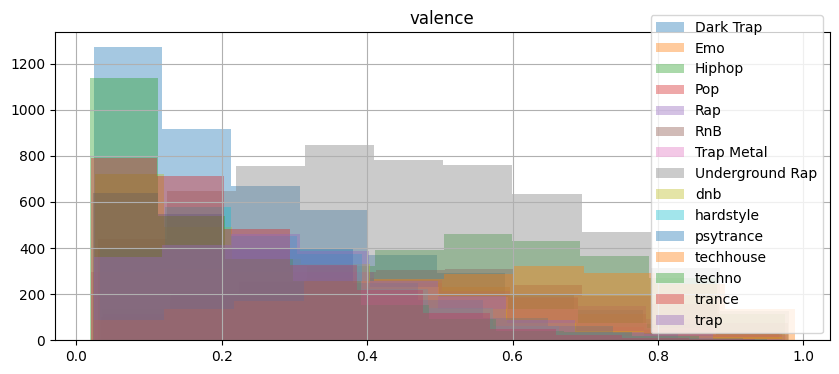

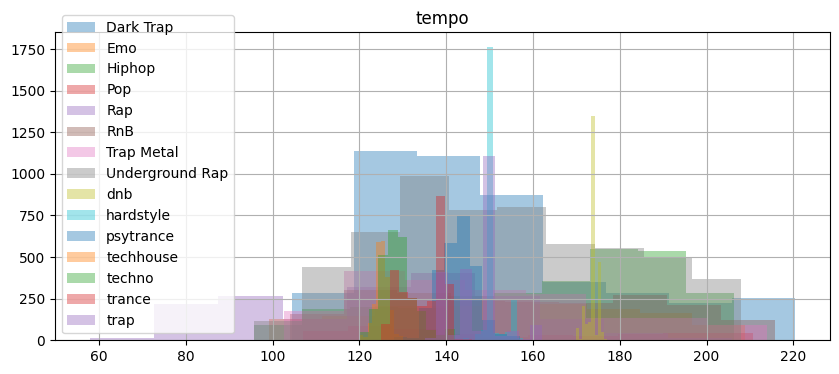

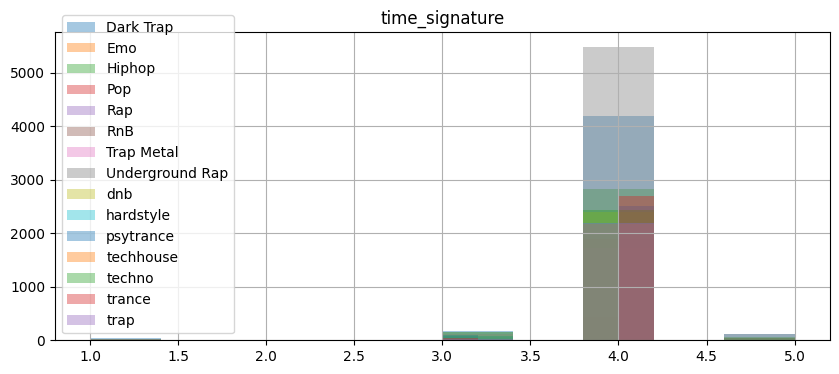

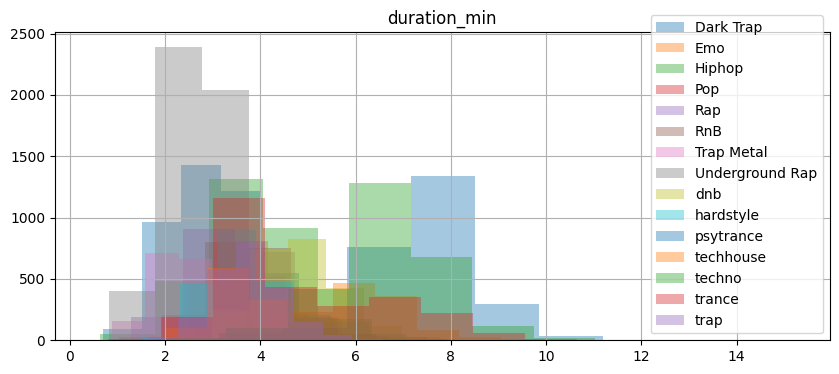

In [17]:
grouped_genre = df.groupby('genre')
for col in numeric.columns:
    fig,ax = plt.subplots()

    for i, d in grouped_genre:
        d[col].hist(alpha = 0.4, ax=ax, label = i, figsize = (10,4))
        ax.set_title(col)

    ax.legend()
    plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
df['genre'] = LabelEncoder().fit_transform(df['genre'])
df['genre'].value_counts()

7     5771
0     4518
2     2960
13    2734
12    2632
10    2610
8     2407
9     2277
14    2226
11    2192
5     2039
6     1897
4     1809
1     1601
3      452
Name: genre, dtype: int64

<AxesSubplot: >

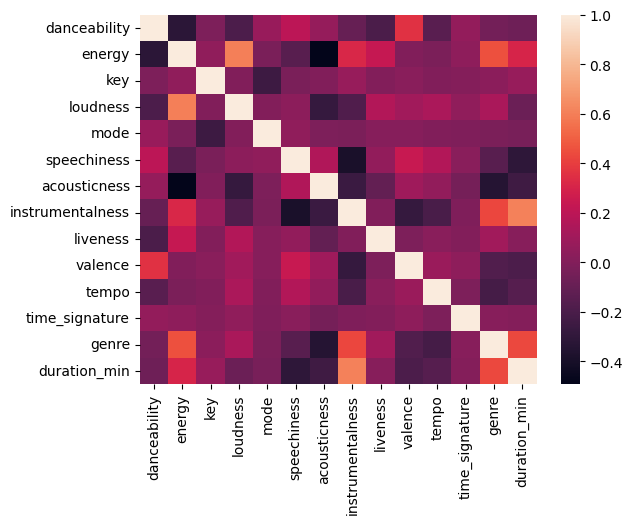

In [21]:
import seaborn as sns
df['genre'] = LabelEncoder().fit_transform(df['genre'])
corr = df.corr()
sns.heatmap(corr)


In [22]:
X = df.drop('genre', axis=1)
y = df['genre']

In [23]:
X.shape

(38125, 13)

In [24]:
y.shape

(38125,)

In [25]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)
X.shape

(86565, 13)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [28]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)
print("Accuracy of RandomForest Classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of RandomForest Classifier: 0.812164269623982


In [29]:
import pickle
pickle.dump(rfc, open('model.pkl', 'wb'))

In [30]:
pickled_model = pickle.load(open('rfc.pkl', 'rb'))
pickled_model.predict(X_test)

c:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([13,  3,  9, ...,  2, 10,  6], dtype=int64)

In [31]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.969993646392884
0.812164269623982


In [32]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import re
client_id = '42941b21de9046c8b880147deda15f1a'
client_secret = 'ff1daeadc5b94461b376e7599e628eaf'
redirect_uri = 'http://localhost:8000/callback'

# Create a client credentials manager
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# Create a Spotipy client
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

data = {
    'url': 'https://audd.tech/example.mp3',
    'return': 'spotify',
    'apitoken': 'test'
}
files = {
    'file': open('C://Users//Ayush//Desktop//rap1.mp3' , 'rb'),   
}
result = requests.post('https://api.audd.io/', data=data, files=files)
x = result.text
track_id = x.split("spotify:track:")[-1][:-4]
# Get track details using the track ID
track = sp.track(track_id)
track_name = track['name']
artist_name = track['artists'][0]['name']
album_name = track['album']['name']
duration_ms = track['duration_ms']

# print('Track:', track_name)
# print('Artist:', artist_name)
# get audio features
song_name_artist = track_name + artist_name
song = sp.search(song_name_artist, limit=5)
audio_features = sp.audio_features(song["tracks"]["items"][0]["id"])[0]
audio_features

{'danceability': 0.95,
 'energy': 0.187,
 'key': 8,
 'loudness': -13.023,
 'mode': 0,
 'speechiness': 0.472,
 'acousticness': 0.871,
 'instrumentalness': 0.00998,
 'liveness': 0.0973,
 'valence': 0.817,
 'tempo': 118.96,
 'type': 'audio_features',
 'id': '2ubHOksho4MFZ7zZXXLRff',
 'uri': 'spotify:track:2ubHOksho4MFZ7zZXXLRff',
 'track_href': 'https://api.spotify.com/v1/tracks/2ubHOksho4MFZ7zZXXLRff',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2ubHOksho4MFZ7zZXXLRff',
 'duration_ms': 150659,
 'time_signature': 4}

In [33]:
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from collections import defaultdict

arr=[]
for i in audio_features.keys():
  if(i=='type'):
    break
  arr.append(audio_features[i])
arr.append(audio_features['time_signature'])
arr.append(audio_features['duration_ms']/60000)

results= ['Dark Trap', 'Emo', 'HipHop', 'Pop', 'Rap', 'RnB', 'Trap Metal', 'Underground Rap', 'DnB', 'HardStyle', 'PsyTrance', 'TechHouse', 'Techno', 'Trance', 'Trap']

out= rfc.predict([arr])
print(results[out[0]])


HipHop
